In [22]:
import numpy as np
import struct
import json 
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path


In [3]:
from __future__ import unicode_literals
import youtube_dl
import os
import shutil
import time

In [4]:
# input : svg file ("Geometric" or "Putative" Adjacency Matrix) for a given model
# output : list of matches
matches = []
svg_file = '/home/sdib/Desktop/1xBp5cFqSvQ'+ "/" + "GeometricAdjacencyMatrix.svg"
for line in open(svg_file, 'r').read().split('\n'):
    if "<rect" in line:
        x = ( np.float(line.split('"')[1]) / 5 )
        y = ( np.float(line.split('"')[3]) / 5 )
        matches.append(sorted([int(x),int(y)]))

/tmp/ipykernel_1605513/1364053985.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = ( np.float(line.split('"')[1]) / 5 )
/tmp/ipykernel_1605513/1364053985.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = ( np.float(line.split('"')[3]) / 5 )


In [5]:
print(matches)

[[0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9], [0, 23], [0, 24], [0, 25], [0, 26], [0, 27], [0, 28], [0, 29], [0, 30], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [1, 7], [1, 8], [1, 9], [1, 23], [1, 24], [1, 25], [1, 26], [1, 27], [1, 28], [1, 29], [1, 30], [1, 31], [2, 3], [2, 4], [2, 5], [2, 6], [2, 7], [2, 8], [2, 9], [2, 23], [2, 24], [2, 25], [2, 26], [2, 27], [2, 28], [2, 29], [2, 30], [2, 31], [2, 32], [3, 4], [3, 5], [3, 6], [3, 7], [3, 8], [3, 9], [3, 23], [3, 24], [3, 25], [3, 26], [3, 27], [3, 28], [3, 29], [3, 30], [3, 31], [3, 32], [3, 33], [4, 5], [4, 6], [4, 7], [4, 8], [4, 9], [4, 23], [4, 24], [4, 25], [4, 26], [4, 27], [4, 28], [4, 29], [4, 30], [4, 31], [4, 32], [4, 33], [4, 34], [5, 6], [5, 7], [5, 8], [5, 9], [5, 10], [5, 23], [5, 24], [5, 25], [5, 26], [5, 27], [5, 28], [5, 29], [5, 30], [5, 31], [5, 32], [5, 33], [5, 34], [5, 35], [6, 7], [6, 8], [6, 9], [6, 10], [6, 11], [6, 12], [6, 23], [6, 24], [6, 25], [6, 26], [6, 27], [6, 28], [6, 29

In [6]:
#Function to recreate an adjacency matrix out of
#the match_list passed as argument."""

# retrieve size of matrix
n = 61

# initialize matrix
adj_mat = np.zeros((61, 61))

idx = np.asarray(matches)

# slice the matrix with correct idxs
adj_mat[idx[:, 0], idx[:, 1]] = 1

#return adj_mat

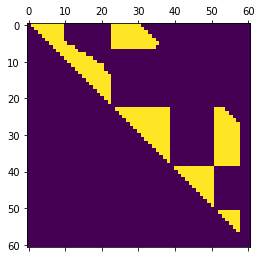

In [7]:
plt.matshow(adj_mat)

In [8]:
# input : list of matches
# output : triangles
#def split_triangles(adj_mat, tol=30):
    #Provides a list containing tuples that describe
    #triangles of images that match : the triangle are composed of the points
    #(i_min, i_min+1), (i_min, i_max), (i_max-1, i_max) in the adjacency matrix.

n = adj_mat.shape[0]
triangles = []
i_min = 0
i_max = 0

for i in range(n):
# Retrieve non zero value for current line
    non_zer = np.nonzero(adj_mat[i])[0]

    # check if at begining or triangle
    if non_zer.size > 0:

        # check if no far image is taken into account
        if abs(non_zer[-1] - non_zer[0]) >= 10:

            length = len(non_zer)
            j = 0

            while j != length-1 and abs(non_zer[j+1] - non_zer[j]) < 10:
                j += 1

        # no far image: take them all
        else:
            i_max = non_zer[-1]

    # empty triangle or at end of triangle
    else:
        if i == i_max:
            # Close triangle
            if i_min < i_max:
                triangles.append((i_min, i_max))
            i_min = i_max = i_max + 1


    #return triangles

In [9]:
triangles

[(0, 22), (23, 50), (51, 57)]

In [10]:
#Read sfm data json file, and transforms it into dictionary
sfm_data_json = '/home/sdib/Desktop/1xBp5cFqSvQ'+ "/" + "sfm_data.json"
with open(sfm_data_json, 'r') as fp:
    sfm_data = json.load(fp)

views = sfm_data['views']
extrinsics = sfm_data['extrinsics']

views_dict = {}
ext_dict = {}

for element in views:
    assert element['key'] not in views_dict.keys(), "Key entry already exists"
    views_dict.update({element['key']: element['value']})
    
for element in extrinsics:
    print('test')
    assert element['key'] not in ext_dict.keys(), "Key entry already exists"
    ext_dict.update({element['key']: element['value']})
    

#return views_dict, ext_dict

In [11]:
views_dict.get(0)['ptr_wrapper']['data']['filename']

'frame0001.png'

In [30]:
#def move_triangles(triangles, path_vid, path_frames, path_feats):

path_frames = '/home/sdib/Desktop/1xBp5cFqSvQ/frames'
path_feats = '/home/sdib/Desktop/1xBp5cFqSvQ/features'
path = '/home/sdib/Desktop/1xBp5cFqSvQ'

s = 0
path_sets = os.path.join(path, 'sets')
if not os.path.isdir(path_sets):
    os.mkdir(path_sets)

for t in triangles:
    
    path_new_folder = os.path.join(path, 'set_{}'.format(s))
    if not os.path.isdir(path_new_folder):
        os.mkdir(path_new_folder)

    path_frames_n = os.path.join(path_new_folder, 'frames')
    if not os.path.isdir((path_frames_n)):
        os.mkdir((path_frames_n))
    
    path_feats_n = os.path.join(path_new_folder, 'features')
    if not os.path.isdir((path_feats_n)):
        os.mkdir((path_feats_n))

    for i in range(t[0], t[1] + 1):

        frame = Path(views_dict.get(i)['ptr_wrapper']['data']['filename'].format(i + 1)).stem
        frame_png = '{}.png'.format(frame)
        frame_desc = '{}.desc'.format(frame)
        frame_feat = '{}.feat'.format(frame)

        # move frames
        try:
            os.rename(os.path.join(path_frames, frame_png),
                      os.path.join(path_frames_n, frame_png))
            print(os.path.join(path_frames, frame_png))
            print(os.path.join(path_frames_n, frame_png))
        except FileNotFoundError:
            pass
        
        # move .desc and .feat
        try:
            os.rename(os.path.join(path_feats, frame_desc),
                      os.path.join(path_feats_n, frame_desc))
        except FileNotFoundError:
            pass
        try:
            os.rename(os.path.join(path_feats, frame_feat),
                      os.path.join(path_feats_n, frame_feat))
        except FileNotFoundError:
            pass
        
    s += 1


/home/sdib/Desktop/1xBp5cFqSvQ/frames/frame0001.png
/home/sdib/Desktop/1xBp5cFqSvQ/set_0/frames/frame0001.png
/home/sdib/Desktop/1xBp5cFqSvQ/frames/frame0002.png
/home/sdib/Desktop/1xBp5cFqSvQ/set_0/frames/frame0002.png
/home/sdib/Desktop/1xBp5cFqSvQ/frames/frame0003.png
/home/sdib/Desktop/1xBp5cFqSvQ/set_0/frames/frame0003.png
/home/sdib/Desktop/1xBp5cFqSvQ/frames/frame0004.png
/home/sdib/Desktop/1xBp5cFqSvQ/set_0/frames/frame0004.png
/home/sdib/Desktop/1xBp5cFqSvQ/frames/frame0005.png
/home/sdib/Desktop/1xBp5cFqSvQ/set_0/frames/frame0005.png
/home/sdib/Desktop/1xBp5cFqSvQ/frames/frame0006.png
/home/sdib/Desktop/1xBp5cFqSvQ/set_0/frames/frame0006.png
/home/sdib/Desktop/1xBp5cFqSvQ/frames/frame0007.png
/home/sdib/Desktop/1xBp5cFqSvQ/set_0/frames/frame0007.png
/home/sdib/Desktop/1xBp5cFqSvQ/frames/frame0008.png
/home/sdib/Desktop/1xBp5cFqSvQ/set_0/frames/frame0008.png
/home/sdib/Desktop/1xBp5cFqSvQ/frames/frame0009.png
/home/sdib/Desktop/1xBp5cFqSvQ/set_0/frames/frame0009.png
/home/sdib